In [51]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection


import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import time
start_time = time.time()

In [52]:
#df1 = pd.read_csv('roboBohr1.csv')
df2 = pd.read_csv('roboBohr1_1.csv')
df3 = pd.read_csv('roboBohr2.csv')
df4 = pd.read_csv('roboBohr2_2.csv')

In [53]:
df=pd.concat([df2, df3, df4], ignore_index=True)
print('El num de filas y columnas: '+str(df.shape))

El num de filas y columnas: (12140, 1278)


# Para poner un target en clases y no tener un modelo de regresión sino convertirlo en uno de clasificación vamos a establecer clases dependiendo del valor de la energía de atomización 

Esto es porque para diferentes materiales, la energía de atomización por ejemplo para algunos fluoruros se encuentra entre 5- 8eV y algunos Óxidos-Cr se encuentran en valores superiores como 6-11eV https://www.sciencedirect.com/topics/engineering/atomisation-energy.

Sería interesante buscar más materiales y no realizar el cálculo de su energía de atomización sino saber qué tipo de material será.

In [54]:
#Creación del vector. La resolución que tiene el valor del traget es de 6 cifras decimales por ello,
#tomaremos la cantidad de puntos similares 10000000
E_at=np.linspace(df.Eat.min(), df.Eat.max(), num=10000000)

#n_class es la cantidad de clases que vamos a tener para clasificar
n_class=10  

cantidad=int(len(E_at)/(n_class))
v_min=df.Eat.min()
v_max=df.Eat.max()
#El vector de definición de rango de las clases
E_at_limits=[]
E_at_limits.append(v_min)
for i in range(n_class):
    E_at_limits.append(E_at[cantidad*(i+1)-1])
print(E_at_limits)

#Ahora vamos a crear el vector target de las clases 
n_filas=df.shape[0]
E_target=np.ones(n_filas)
for i in range(n_filas):
    inst=df.Eat[i]
    for j in range(n_class-1):
        if inst>=round(E_at_limits[j],6) and inst<round(E_at_limits[j+1],6):
            E_target[i]=int(j)
    if inst>=round(E_at_limits[n_class-1],6) and inst<round(E_at_limits[n_class],6):
        E_target[i]=int(n_class-1)

[-23.2453726199999, -20.999788715027442, -18.75420256446884, -16.508616413910232, -14.263030263351629, -12.017444112793024, -9.77185796223442, -7.526271811675816, -5.280685661117211, -3.035099510558606, -0.7895133600000008]


In [55]:
#Eliminando la col Y numérica 
Y=df['Eat']
df = df.drop(['Eat'], axis = 1)

import sklearn.datasets as skdata
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

%matplotlib inline

In [56]:
x_train, x_test, y_train, y_test = train_test_split(df, E_target, test_size=0.5)

t0 = time.time() #Estos parámetros son con los pasos que tomará para convergencia por descenso de gradiente que es como funciona la regresión logística
train_samples = 200

scaler = StandardScaler() #Normalizar los datos
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Experimento 1: Softmax

In [57]:
from sklearn.metrics import f1_score

mlp = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(4,4,4),max_iter=2000)

In [58]:
F1s_Train=[]
F1s_Test=[]
for i in range(10):
    sub=int(0.1*(i+1)*len(x_train))
    sub1=int(0.1*(i+1)*len(x_test))
    x_sub_train=x_train[: sub,:]
    y_sub_train=y_train[: sub]
    x_sub_test=x_test[: sub1,:]
    y_sub_test=y_test[: sub1]
    
    mlp.fit(x_sub_train, y_sub_train)
    F1s_Train.append(f1_score(y_sub_train, mlp.predict(x_sub_train), average='macro'))
    F1s_Test.append(f1_score(y_sub_test, mlp.predict(x_sub_test), average='macro'))

C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-p

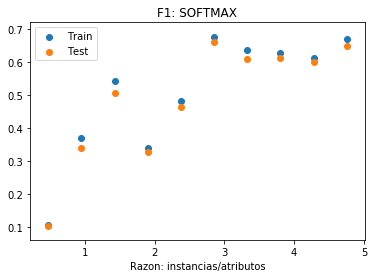

In [59]:
x1=[]
x2=[]
for i in range(10):
    x1.append(int(0.1*(i+1)*len(x_train))/(np.shape(x_train)[1]))
    x2.append(int(0.1*(i+1)*len(x_test))/(np.shape(x_train)[1]))

plt.scatter(x1,F1s_Train,label='Train')
plt.scatter(x2,F1s_Test,label='Test')
plt.title('F1: SOFTMAX')
plt.xlabel('Razon: instancias/atributos')
plt.legend()

Se observa que el valor de F1 mejora significativamente cuando la razón entre el # de instancias vs # de atributos es mayor a uno lo cual implica que hay más instancias que atributos. EL aumento esta en un 30% sin embargo no es un valor aceptable para F1. Cuando la razón es 3 aproximadamente se obtiene el máximo del F1. Se mantiene lo esperado F1s_Train>F1_Test y muy cercanos.

In [60]:
from sklearn.metrics import f1_score

mlp = sklearn.neural_network.MLPClassifier(activation='relu', hidden_layer_sizes=(4,4,4),max_iter=2000)


In [61]:
F1s_Train=[]
F1s_Test=[]
for i in range(10):
    sub=int(0.1*(i+1)*len(x_train))
    sub1=int(0.1*(i+1)*len(x_test))
    x_sub_train=x_train[: sub,:]
    y_sub_train=y_train[: sub]
    x_sub_test=x_test[: sub1,:]
    y_sub_test=y_test[: sub1]
    
    mlp.fit(x_sub_train, y_sub_train)
    F1s_Train.append(f1_score(y_sub_train, mlp.predict(x_sub_train), average='macro'))
    F1s_Test.append(f1_score(y_sub_test, mlp.predict(x_sub_test), average='macro'))

C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-p

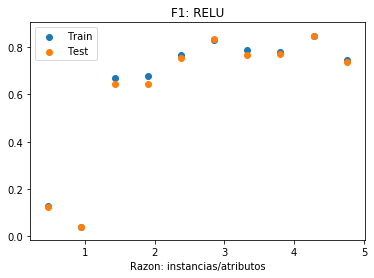

In [62]:
x1=[]
x2=[]
for i in range(10):
    x1.append(int(0.1*(i+1)*len(x_train))/(np.shape(x_train)[1]))
    x2.append(int(0.1*(i+1)*len(x_test))/(np.shape(x_train)[1]))

plt.scatter(x1,F1s_Train,label='Train')
plt.scatter(x2,F1s_Test,label='Test')
plt.title('F1: RELU')
plt.xlabel('Razon: instancias/atributos')
plt.legend()

Con la función de activación "RELU" se aumentan los valores de F1 tanto para Train y Test.
Existen dos picos en la grafica donde los valores F1 Test y Train son dificílmente diferenciables y donde adicionalmente, se presentan valores cercanos de F1.

Con los dos experimentos anteriores se puede concluir que la cantidad de instancias sí afecta los valores F1 sin necesidad de ser una relación directamente proporcional entre F1 y razon de #instancias vs #atributos como yo lo pensaba.

# Experimento 3: Variar alpha

In [71]:
F1s_Train=[]
F1s_Test=[]
alphas= np.logspace(-6, 0, num=10)
for i in range(len(alphas)):
    mlp = sklearn.neural_network.MLPClassifier(activation='relu', hidden_layer_sizes=(4,4,4),max_iter=2000,alpha=alphas[i])
    mlp.fit(x_train, y_train)
    F1s_Train.append(f1_score(y_train, mlp.predict(x_train), average='macro'))
    F1s_Test.append(f1_score(y_test, mlp.predict(x_test), average='macro'))


C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-p

[1.00000000e-05 5.99484250e-05 3.59381366e-04 2.15443469e-03
 1.29154967e-02 7.74263683e-02 4.64158883e-01 2.78255940e+00
 1.66810054e+01 1.00000000e+02]


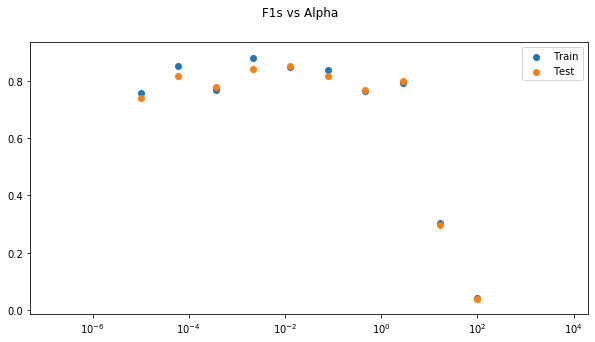

In [77]:
fig=plt.figure(figsize=(10, 5))   

ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
ax.scatter(alphas,F1s_Train, label='Train')
ax.scatter(alphas,F1s_Test, label='Test')

plt.suptitle('F1s vs Alpha')
plt.legend()
print(alphas)

Se observa que los valores de alpha que maximizan F1 estan en el orden de 10^-4 y 10^-1. Teniendo en cuenta la variación realizada al valor C en el ejercicio de regresión logística este resultado es coherente con lo encontrado. Con esto vemos el orden de magnitud de la regularización necesaria para mantener la razón sesgo varianza al entrenar. 
También observamos que para ciertos valores el F1_test es mayor, para evitar errores de generalización, se sigue conservando la idea de elegir alphas cuyo F1 en Train sea mayor que en Test.